In [1]:
from fabfile import *

In [2]:
# job = Job.oarsub_cluster(site='grenoble', username='tocornebize', clusters=['dahu'], walltime=Time(hours=8), nb_nodes=2, deploy=False, queue='testing')
job = Job.oarsub_cluster(site='nancy', username='tocornebize', clusters=['grvingt'], walltime=Time(hours=2), nb_nodes=2, deploy=False, queue='testing')

[2018-07-10 12:24:56][INFO] [frontend] oarsub -q testing -t allow_classic_ssh -l "{cluster in ('grvingt')}/nodes=2,walltime=02:00:00" -r "2018-07-10 12:24:56"


In [3]:
mpi_install(job)

[2018-07-10 12:25:01][INFO] Job(1607574)
[2018-07-10 12:25:01][INFO] [frontend] oarstat -fJ -j 1607574
[2018-07-10 12:25:06][INFO] [frontend] oarstat -fJ -j 1607574
[2018-07-10 12:25:18][INFO] [frontend] oarstat -fJ -j 1607574
[2018-07-10 12:25:39][INFO] [frontend] oarstat -fJ -j 1607574
[2018-07-10 12:25:40][INFO] Nodes: grvingt-7.nancy.grid5000.fr and grvingt-8.nancy.grid5000.fr
[2018-07-10 12:25:45][INFO] [allnodes] cd /tmp && hostname
[2018-07-10 12:25:45][INFO] [allnodes] cd /tmp && sudo-g5k apt update && sudo-g5k apt upgrade -y
[2018-07-10 12:26:21][INFO] [allnodes] cd /tmp && sudo-g5k apt install -y build-essential python3 python3-dev zip make git time libopenmpi-dev openmpi-bin libxml2 libxml2-dev hwloc pciutils net-tools
[2018-07-10 12:26:25][INFO] [allnodes] cd /tmp && git clone https://gitlab.inria.fr/simgrid/platform-calibration.git
[2018-07-10 12:26:38][INFO] [allnodes] cd /tmp && cd platform-calibration/src/calibration && make


Job(1607574)

In [4]:
run_calibration(job)
job.oardel()

[2018-07-10 12:26:39][INFO] [grvingt-7.nancy.grid5000.fr] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmpazcnbg0m → /tmp/platform-calibration/src/calibration/exp.xml
[2018-07-10 12:26:39][INFO] [grvingt-8.nancy.grid5000.fr] put: /home/tom/Dropbox/Documents/Fac/phd/mpi_calibration/tmpazcnbg0m → /tmp/platform-calibration/src/calibration/exp.xml
[2018-07-10 12:26:39][INFO] [allnodes] cd /tmp && mkdir -p /tmp/platform-calibration/src/calibration/exp
[2018-07-10 12:26:39][INFO] [grvingt-7.nancy.grid5000.fr] cd /tmp/platform-calibration/src/calibration && mpirun --allow-run-as-root -np 2 -host grvingt-7.nancy.grid5000.fr,grvingt-8.nancy.grid5000.fr ./calibrate -f exp.xml
[2018-07-10 12:26:50][INFO] [grvingt-7.nancy.grid5000.fr] cd /tmp/platform-calibration/src/calibration && zip -r /tmp/grvingt-7-grvingt-8_2018-07-10_1607574.zip exp
[2018-07-10 12:26:51][INFO] [grvingt-7.nancy.grid5000.fr] cd /tmp && mkdir -p information/grvingt-7.nancy.grid5000.fr
[2018-07-10 12:26:51][INFO] [g

In [5]:
import os
archive_name = [f for f in os.listdir() if f.endswith('.zip') and f.startswith('grvingt')]
assert len(archive_name) == 1
archive_name = archive_name[0]
print(archive_name)

grvingt-7-grvingt-8_2018-07-10_1607574.zip


In [6]:
from extract_archive import *
archive = extract_zip(archive_name)

In [7]:
!unzip -p $archive_name info.yaml

command: /home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/site-packages/ipykernel_launcher.py
  -f /run/user/1000/jupyter/kernel-c2d543e0-a9b6-4a97-84f2-04c46235f14e.json
deployment: false
grvingt-7.nancy.grid5000.fr:
  arp:
    api-proxy.nancy.grid5000.fr:
    - (172.16.79.118) at 00:16:3e:91:f3:fe [ether] on br0
    apt-global.nancy.grid5000.fr:
    - (172.16.79.109) at 52:54:00:90:2d:67 [ether] on br0
    dns.nancy.grid5000.fr:
    - (172.16.79.106) at 00:16:3e:5b:65:0b [ether] on br0
    fnancy.nancy.grid5000.fr:
    - (172.16.79.101) at 00:16:3e:6a:bb:1b [ether] on br0
    grvingt-8-ib0.nancy.grid5000.fr:
    - (172.18.76.8) at 80:00:00:02:fe:80:00:00:00 [ether] on ib0
    grvingt-8.nancy.grid5000.fr:
    - (172.16.76.8) at 3c:fd:fe:57:72:98 [ether] on br0
    kadeploy.nancy.grid5000.fr:
    - (172.16.79.102) at 00:16:3e:65:d3:82 [ether] on br0
    ldap.nancy.grid5000.fr:
    - (172.16.79.115) at 00:16:3e:a1:a7:f2 [ether] on br0
    oar.nancy.grid5000.fr:


In [8]:
import pytree
print(pytree.__version__)
print(pytree.__git_version__)

0.0.5
bb16b289288440b67ae6f3afc5c2ab120ce50175


In [9]:
df = archive['exp/exp_Recv.csv']

In [10]:
reg = pytree.compute_regression(x=df.msg_size, y=df.duration).auto_simplify()
reg

-inf < x ≤ 1.400e+01
	y ~ 7.025e-09x + 1.551e-06
1.400e+01 < x ≤ 3.238e+03
	y ~ 2.864e-11x + 1.924e-06
3.238e+03 < x ≤ 4.699e+03
	y ~ -6.094e-10x + 4.625e-06
4.699e+03 < x ≤ 8.023e+03
	y ~ -4.538e-11x + 2.924e-06
8.023e+03 < x ≤ 8.694e+03
	y ~ -9.645e-11x + 2.330e-06
8.694e+03 < x ≤ 9.853e+03
	y ~ -1.555e-09x + 1.686e-05
9.853e+03 < x ≤ 1.014e+04
	y ~ -3.550e-10x + 6.828e-06
1.014e+04 < x ≤ 1.193e+04
	y ~ 1.081e-09x + -9.042e-06
1.193e+04 < x ≤ 1.266e+04
	y ~ -1.153e-08x + 1.477e-04
1.266e+04 < x ≤ 1.319e+04
	y ~ -4.888e-09x + 6.645e-05
1.319e+04 < x ≤ 1.368e+04
	y ~ -7.860e-09x + 1.094e-04
1.368e+04 < x ≤ 1.456e+04
	y ~ -2.258e-09x + 3.466e-05
1.456e+04 < x ≤ 1.487e+04
	y ~ -9.924e-09x + 1.498e-04
1.487e+04 < x ≤ 1.711e+04
	y ~ -1.699e-09x + 3.109e-05
1.711e+04 < x ≤ 2.284e+04
	y ~ 2.019e-10x + 7.413e-07
2.284e+04 < x ≤ 2.510e+04
	y ~ 6.176e-10x + -1.183e-05
2.510e+04 < x ≤ 6.279e+04
	y ~ 1.165e-10x + 2.328e-06
6.279e+04 < x ≤ 4.335e+05
	y ~ 7.893e-11x + 1.203e-05
4.335e+05 < x ≤ inf


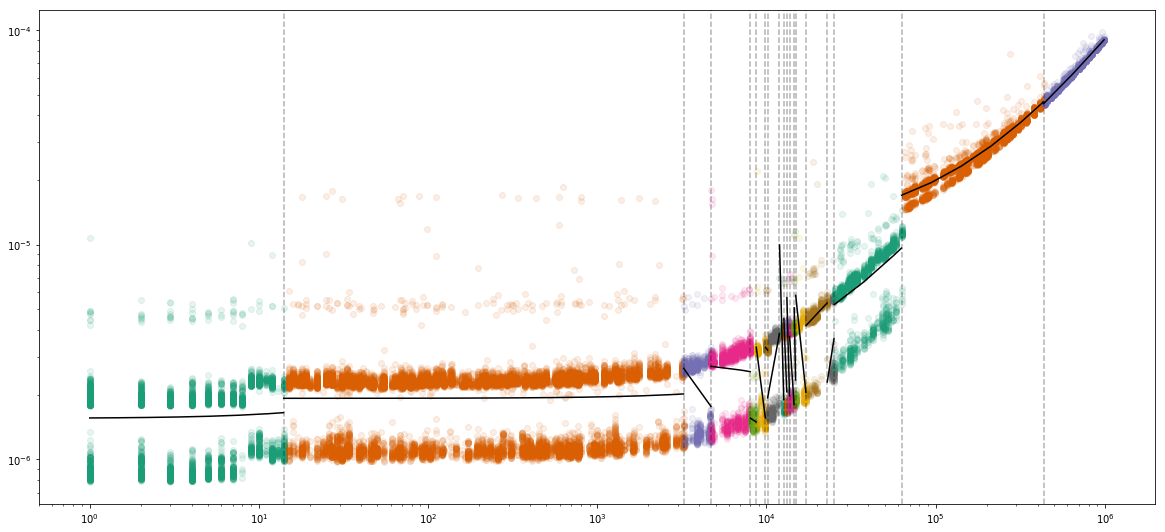

In [11]:
reg.plot_dataset(log=True, alpha=0.1)

In [12]:
cleaned_df = clean_dataset(df)
cleaned_reg = pytree.compute_regression(x=cleaned_df.msg_size, y=cleaned_df.duration).auto_simplify()
cleaned_reg

-inf < x ≤ 6.279e+04
	y ~ 1.086e-10x + 1.544e-06
6.279e+04 < x ≤ inf
	y ~ 7.870e-11x + 1.117e-05

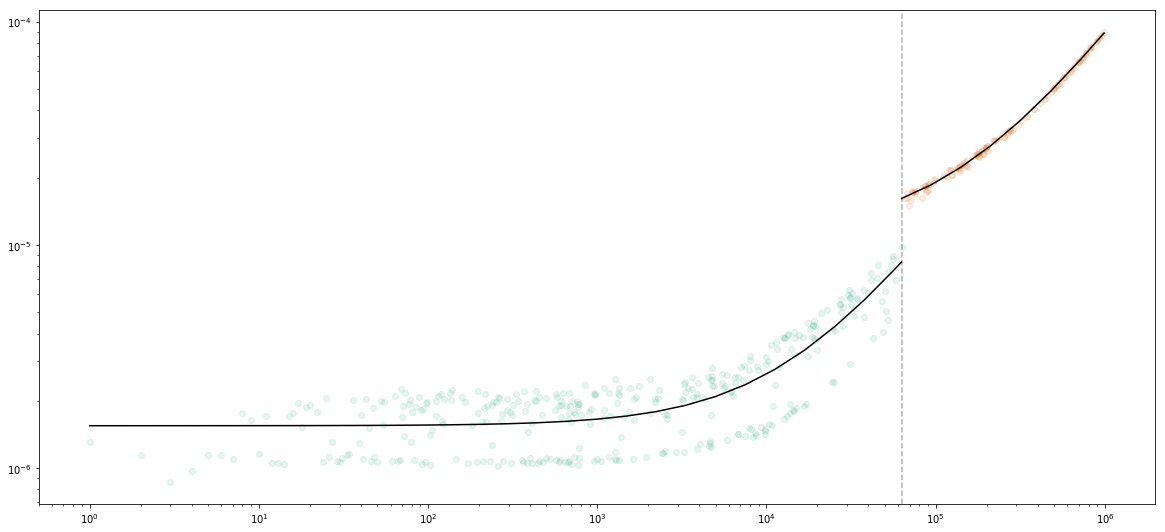

In [13]:
cleaned_reg.plot_dataset(log=True, alpha=0.1)

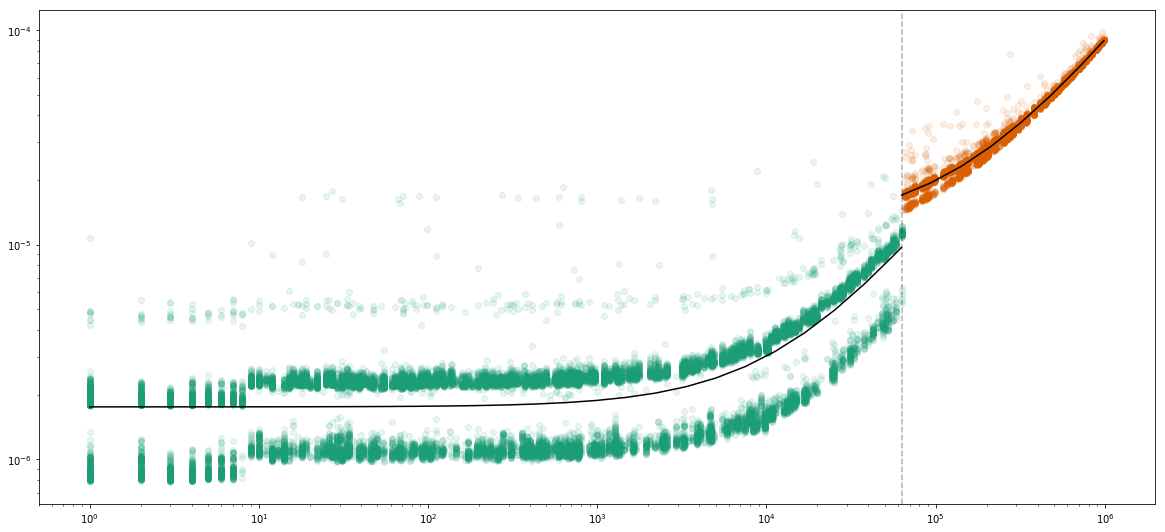

In [14]:
reg = pytree.compute_regression(x=df.msg_size, y=df.duration, breakpoints=cleaned_reg.breakpoints).auto_simplify()
reg.plot_dataset(log=True, alpha=0.1)